In [123]:
import pandas as pd
import matplotlib.pyplot as plt


In [124]:
df=pd.read_csv("dopamine_receptor_total.csv")
df.head(5)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,34848,[],CHEMBL872503,Binding affinity towards dopamine transporter ...,B,NaN,NaN,BAO_0000192,BAO_0000221,...,Homo sapiens,Dopamine transporter,9606,NaN,NaN,Ki,nM,UO_0000065,NaN,17.0
1,NaN,34849,[],CHEMBL671773,Binding affinity towards dopamine transporter ...,B,NaN,NaN,BAO_0000192,BAO_0000357,...,Homo sapiens,Dopamine transporter,9606,NaN,NaN,Ki,nM,UO_0000065,NaN,224.0
2,NaN,53423,[],CHEMBL872503,Binding affinity towards dopamine transporter ...,B,NaN,NaN,BAO_0000192,BAO_0000221,...,Homo sapiens,Dopamine transporter,9606,NaN,NaN,Ki,nM,UO_0000065,NaN,33.0
3,NaN,53424,[],CHEMBL671773,Binding affinity towards dopamine transporter ...,B,NaN,NaN,BAO_0000192,BAO_0000357,...,Homo sapiens,Dopamine transporter,9606,NaN,NaN,Ki,nM,UO_0000065,NaN,314.0
4,NaN,53425,[],CHEMBL671771,Inhibitory activity against [3H]-Dopamine upta...,B,NaN,NaN,BAO_0000190,BAO_0000221,...,Homo sapiens,Dopamine transporter,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,373.0


In [125]:
df.shape

(8227, 45)

In [126]:
for col in df.columns:
    print(col)

activity_comment
activity_id
activity_properties
assay_chembl_id
assay_description
assay_type
assay_variant_accession
assay_variant_mutation
bao_endpoint
bao_format
bao_label
canonical_smiles
data_validity_comment
data_validity_description
document_chembl_id
document_journal
document_year
ligand_efficiency
molecule_chembl_id
molecule_pref_name
parent_molecule_chembl_id
pchembl_value
potential_duplicate
qudt_units
record_id
relation
src_id
standard_flag
standard_relation
standard_text_value
standard_type
standard_units
standard_upper_value
standard_value
target_chembl_id
target_organism
target_pref_name
target_tax_id
text_value
toid
type
units
uo_units
upper_value
value


In [127]:
df.standard_type.value_counts()

IC50                                                   3402
Ki                                                     3072
Inhibition                                             1258
Activity                                                186
Ratio                                                    76
pKD                                                      56
EC50                                                     53
Log 1/C                                                  50
Kd                                                       21
% Ctrl                                                   12
% Inhibition of Control Specific Binding (Mean n=2)       9
Displacement                                              6
IC5                                                       4
Ratio Ki                                                  4
pKi                                                       3
Efficacy                                                  2
Ratio IC50                              

In [140]:
#selecting only IC50, Ki, Inhibition and Activity

data= df.loc[(df['standard_type']=="IC50") | (df['standard_type']=="Ki") | (df['standard_type']=="Inhibition") | (df['standard_type']=="Activity")]
print(data.standard_type.value_counts())
print(data.shape)

IC50          3402
Ki            3072
Inhibition    1258
Activity       186
Name: standard_type, dtype: int64
(7918, 45)


In [134]:
#missing standard values
print("missing in standard_value",data.standard_value.isna().sum())
print("missing in canonical_smiles",data.canonical_smiles.isna().sum())

missing in standard_value 2017
missing in canonical_smiles 99


In [135]:
missing =data.standard_value.isna().sum()
non_missing = data.standard_value.notnull().sum()

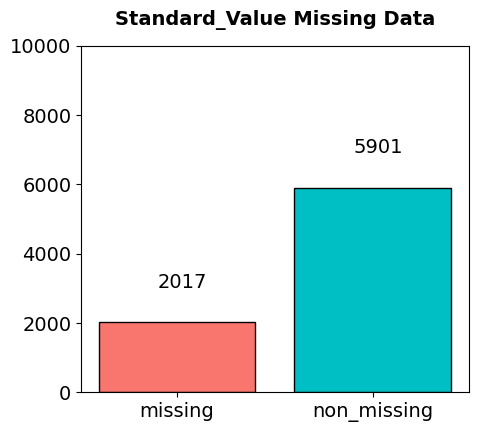

In [136]:


x = ['missing', 'non_missing']
y = [missing, non_missing]

# Setup plot
fig, ax = plt.subplots()

# Make bar plot
p = ax.bar(x, y, color = ['#F8766D', '#00BFC4'], ec = 'black')

ax.set_title('Standard_Value Missing Data', fontsize=14, fontweight='bold', pad=15)
#ax.set_xticklabels(x, fontweight='bold')

ax.set_ylim(0,10000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Label above bar
for index, data in enumerate(y):
    plt.text(x=index-0.1 , y =data+1000 , s=f"{data}" , fontdict=dict(fontsize=14))

fig.set_size_inches(5,4.5)
plt.show()


In [141]:
#drop missing values
data=data.dropna(subset='standard_value',axis='rows')
print(data.standard_value.isna().sum())
data=data.dropna(subset='canonical_smiles',axis='rows')
print(data.canonical_smiles.isna().sum())

0
0


In [73]:
data.shape

(5866, 45)

In [147]:
data=data[data['standard_value'].notna()]
data=data[data['canonical_smiles'].notna()]

In [146]:
data.shape

(5866, 45)

In [76]:
data[data.molecule_chembl_id.duplicated()]

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
3,NaN,53424,[],CHEMBL671773,Binding affinity towards dopamine transporter ...,B,NaN,NaN,BAO_0000192,BAO_0000357,...,Homo sapiens,Dopamine transporter,9606,NaN,NaN,Ki,nM,UO_0000065,NaN,314.00
4,NaN,53425,[],CHEMBL671771,Inhibitory activity against [3H]-Dopamine upta...,B,NaN,NaN,BAO_0000190,BAO_0000221,...,Homo sapiens,Dopamine transporter,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,373.00
6,NaN,70052,[],CHEMBL671773,Binding affinity towards dopamine transporter ...,B,NaN,NaN,BAO_0000192,BAO_0000357,...,Homo sapiens,Dopamine transporter,9606,NaN,NaN,Ki,nM,UO_0000065,NaN,388.00
7,NaN,70053,[],CHEMBL671771,Inhibitory activity against [3H]-Dopamine upta...,B,NaN,NaN,BAO_0000190,BAO_0000221,...,Homo sapiens,Dopamine transporter,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,405.00
11,NaN,75845,[],CHEMBL674122,Antagonism of cocaine''s inhibition of [3H]DA ...,F,NaN,NaN,BAO_0000190,BAO_0000019,...,Homo sapiens,Dopamine transporter,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,717.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201,NaN,23378895,[],CHEMBL4880041,GPCRScan assay: inhibition of DAT,B,NaN,NaN,BAO_0000192,BAO_0000357,...,Homo sapiens,Dopamine transporter,9606,NaN,NaN,pKi,NaN,UO_0000065,NaN,5.75
8202,Not Active,23378931,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4880041,GPCRScan assay: inhibition of DAT,B,NaN,NaN,BAO_0000201,BAO_0000357,...,Homo sapiens,Dopamine transporter,9606,NaN,NaN,% Inhibition,%,UO_0000187,NaN,-6.45
8209,Not Active,23380522,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4880041,GPCRScan assay: inhibition of DAT,B,NaN,NaN,BAO_0000201,BAO_0000357,...,Homo sapiens,Dopamine transporter,9606,NaN,NaN,% Inhibition,%,UO_0000187,NaN,-7.27
8212,Not Active,23381178,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4880041,GPCRScan assay: inhibition of DAT,B,NaN,NaN,BAO_0000201,BAO_0000357,...,Homo sapiens,Dopamine transporter,9606,NaN,NaN,% Inhibition,%,UO_0000187,NaN,-14.46


In [77]:
#molecule_chembl_id - remove redundancy
data = df.drop_duplicates(['molecule_chembl_id'])
data.molecule_chembl_id.value_counts()

CHEMBL178011     1
CHEMBL695        1
CHEMBL141343     1
CHEMBL1475       1
CHEMBL24944      1
                ..
CHEMBL517424     1
CHEMBL461153     1
CHEMBL461330     1
CHEMBL461241     1
CHEMBL4802042    1
Name: molecule_chembl_id, Length: 5499, dtype: int64

In [78]:
data.canonical_smiles.isnull().sum()

49

In [152]:
#Drop unwanted columns
data=data[['molecule_chembl_id','canonical_smiles','standard_value','standard_type']]
data.head(10)

,molecule_chembl_id,canonical_smiles,standard_value,standard_type
2,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,33.0,Ki
3,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,314.0,Ki
4,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,373.0,IC50
5,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,32.0,Ki
6,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,388.0,Ki
7,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,405.0,IC50
10,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,470.0,IC50
11,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,717.0,IC50
12,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,1161.0,IC50
13,CHEMBL333280,CN1CCC(O)(c2ccc(Cl)c(Cl)c2)C([C@@H](O)c2ccc(Cl...,4140.0,Ki


In [94]:
data.shape

(4366, 3)

In [92]:
#calculating fingerprint descriptor
import padelpy
from padelpy import padeldescriptor
data_topadel = data[['molecule_chembl_id','canonical_smiles']]
data_topadel

,molecule_chembl_id,canonical_smiles
2,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl
5,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...
10,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...
13,CHEMBL333280,CN1CCC(O)(c2ccc(Cl)c(Cl)c2)C([C@@H](O)c2ccc(Cl...
14,CHEMBL120490,CN1CCC(O)(c2ccc(Cl)c(Cl)c2)C(C(=O)c2ccc(Cl)c(C...
...,...,...
8221,CHEMBL4802045,CC[C@@H](Nc1c(C#N)c(-c2ccc(-c3cccc(C)c3F)cc2)n...
8222,CHEMBL4802039,CC(=O)Nc1ncc(CN2CCC[C@H](Cc3cc(C)nc(C)c3)C2)s1
8223,CHEMBL4568735,CO[C@@H](C)c1c(Nc2ccc([C@H](N(C)C(=O)C3CCS(=O)...
8224,CHEMBL4584981,CO[C@@H](C)c1c(Nc2ccc([C@@H](N(C)C(=O)C3CCS(=O...


In [ ]:
#Lepinski descriptors


In [87]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np

In [88]:
#function for lipinski calculator from. : https://codeocean.com/explore/capsules?query=tag:data-curation
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [89]:
lipinski1 = lipinski(data.canonical_smiles)
lipinski1

,MW,LogP,NumHDonors,NumHAcceptors
0,295.810,2.84770,0.0,3.0
1,303.358,1.86770,0.0,5.0
2,626.794,5.18954,1.0,8.0
3,435.178,5.17310,2.0,3.0
4,433.162,5.32240,1.0,3.0
...,...,...,...,...
4361,440.478,5.55810,2.0,5.0
4362,358.511,3.56804,1.0,5.0
4363,574.025,4.72030,1.0,8.0
4364,574.025,4.72030,1.0,8.0


In [153]:
#combine both dataframes
df_combined = pd.concat([data,lipinski1], axis=1)
df_combined.head(40)

,molecule_chembl_id,canonical_smiles,standard_value,standard_type,MW,LogP,NumHDonors,NumHAcceptors
2,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,33.00,Ki,626.794,5.18954,1.0,8.0
3,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,314.00,Ki,435.178,5.17310,2.0,3.0
4,CHEMBL1790051,COC(=O)[C@@H]1C2CC[C@H](C[C@@H]1c1ccccc1)N2C.Cl,373.00,IC50,433.162,5.32240,1.0,3.0
5,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,32.00,Ki,351.446,4.35854,0.0,4.0
6,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,388.00,Ki,325.452,3.17634,2.0,3.0
7,CHEMBL370805,COC(=O)[C@H]1[C@@H](OC(=O)c2ccccc2)C[C@@H]2CC[...,405.00,IC50,331.362,2.98700,1.0,3.0
10,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,470.00,IC50,299.414,3.45900,0.0,3.0
11,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,717.00,IC50,385.245,3.03050,0.0,3.0
12,CHEMBL120633,COC(=O)[C@@H]1C2CCC(C[C@@H]1C(=O)Oc1ccccc1)N2C...,1161.00,IC50,397.256,3.48940,1.0,3.0
13,CHEMBL333280,CN1CCC(O)(c2ccc(Cl)c(Cl)c2)C([C@@H](O)c2ccc(Cl...,4140.00,Ki,266.388,3.53280,1.0,2.0


In [154]:
df_combined.groupby('standard_type').count()

,molecule_chembl_id,canonical_smiles,standard_value,MW,LogP,NumHDonors,NumHAcceptors
standard_type,,,,,,,
Activity,133,133,133,84,84,84,84
IC50,2457,2457,2457,1698,1698,1698,1698
Inhibition,1083,1083,1083,327,327,327,327
Ki,2193,2193,2193,1545,1545,1545,1545


In [156]:
df_combined.standard_type.value_counts()

IC50          2457
Ki            2193
Inhibition    1083
Activity       133
Name: standard_type, dtype: int64

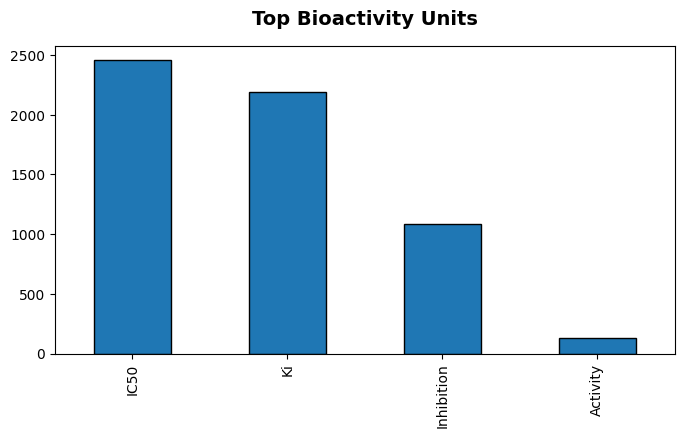

In [158]:
df_combined.standard_type.value_counts()[:10].plot.bar(figsize=(8,4), ec='black')

plt.title('Top Bioactivity Units', fontsize=14, fontweight='black', pad=15)
plt.show()

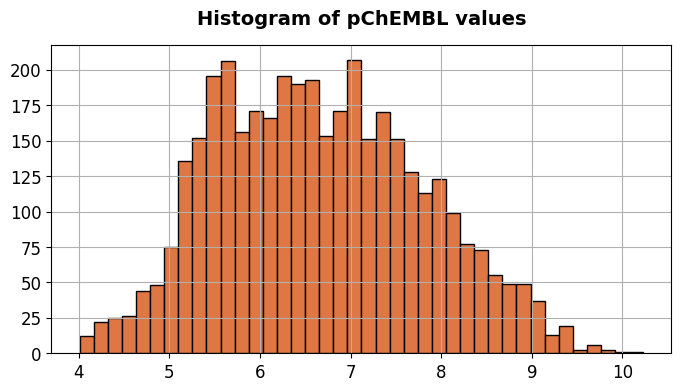

In [163]:
df.pchembl_value.hist(bins=40, figsize=(8,4), color='#de7744', ec='black')

plt.title('Histogram of pChEMBL values', fontsize=14, fontweight='black', pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [164]:
df_combined.standard_value.describe()

count    5.866000e+03
mean     5.298647e+11
std      1.642429e+13
min     -6.390000e+01
25%      2.881000e+01
50%      1.781500e+02
75%      2.421000e+03
max      9.120108e+14
Name: standard_value, dtype: float64

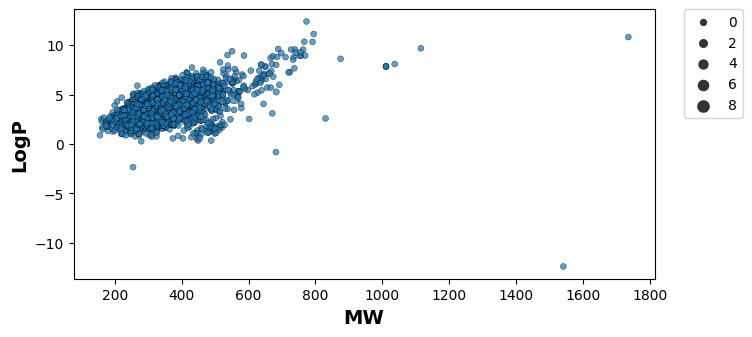

In [176]:
import seaborn as sns
plt.figure(figsize=(7.5, 3.5))

sns.scatterplot(x='MW', y='LogP', data=df_combined,  size='standard_value', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')